## Logistic Regression Model
#### "Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability." -Ayush Pant


In a logistic regression model, we have our inputs (x1,x2,x3,etc) that are each multiplied by a weight value and then summed to a bias. looks something like this: y = wx + b

Weights and biases are learnable parameters for the model. The model adjusts these parameters until it outputs a correct value.

![alt text](https://naadispeaks.files.wordpress.com/2017/11/vqope.jpg?w=630 "Log Mod")

After this, it goes through a transformation(or activation) function:$$\sigma(z)=\frac{1}{1 + e^{-z}}$$

This function will output a value between 0 and 1 (0 being a negative classification and 1 being a positive classification). This gives us the predicted value! For example, if the model is making a prediction of the object being in class y and the predicted output is 0, then it is not in class y.


Now that we know more about how logistic regression works, lets fit our model.


In [ ]:
import pandas as pd 
import numpy as np

In [3]:
#First we need to read in the training and test sets we made in the last notebook.
import pandas as pd 

X_train = pd.read_csv('data/X_train.csv', index_col = 0)
X_test = pd.read_csv('data/X_test.csv', index_col = 0)
y_test = pd.read_csv('data/y_test.csv', index_col = 0)
y_train = pd.read_csv('data/y_train.csv', index_col = 0)

training = pd.read_csv('data/training_set.csv')
meta = pd.read_csv('data/training_set_metadata.csv', delimiter=",")
X = pd.read_csv('data/X.csv')

In [246]:
#Fit training set into the model

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [247]:
#Now run the model with the test set and obtain the prediction accuracy
y_pred = logreg.predict(X_test) 
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73


### Confusion Matrix
#### A confusion matrix gives us a table of the true positives, false positives, true negatives, and false negatives. It helps us see how our model is performing. 
    * True positive: Model predicted yes to class, and it actually was that class
    * True negative: Model predicted no to class, and it actually wasn't that class
    * False positive: Model predicted yes to class, and it actually wasn't that class
    * False negative: Model predicted no to class, and it actually was that class

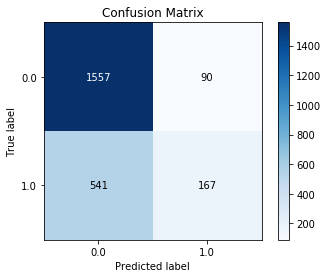

In [250]:
#Create the confusion matrix with the predicted values and the actual values
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

Note: we want largest numbers across the diagonal -- where 0 is aligned with 0 and 1 is aligned with 1

In [218]:
#Make a dataframe with each object's class prediction and actual class to see which objects 

#Find object IDs by pairing the indexes in Xtest to the objects
X_test_ind = list(X_test.index)
X_test_obj = []
for i in X_test_ind:
    X_test_obj.append(X.iloc[i]['object_id'])


#Find class prediction for objects
ypred_df = pd.DataFrame(columns=['obj_ind','object_id','pred','actual'])
ypred_df['object_id'] = X_test_obj
ypred_df['obj_ind'] = X_test_ind
for n in range(len(X_test_obj)):
    ypred_df.at[(n,'pred')] = y_pred[n]
for i in X_test_ind:
    ypred_df.loc[ypred_df['obj_ind'] == i, 'actual'] = y_test.loc[i]['class']
    
ypred_df.head(10)

,obj_ind,object_id,pred,actual
0,1710,276496.0,0,0
1,499,84306.0,0,0
2,834,139016.0,0,0
3,7340,119173316.0,0,1
4,4671,59025320.0,0,0
5,4549,56308175.0,0,1
6,3098,22178234.0,0,1
7,4288,49850869.0,0,0
8,7793,129554871.0,0,0
9,5809,84937194.0,0,1
